In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline
from scipy import stats

In [2]:
df_homes = pd.read_csv("Resources/Metro_homes.csv")
df_homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416926 entries, 0 to 416925
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   period_begin                    416926 non-null  object 
 1   period_end                      416926 non-null  object 
 2   parent_metro_region_metro_code  416926 non-null  int64  
 3   parent_metro_region             416926 non-null  object 
 4   state_code                      416926 non-null  object 
 5   property_type_id                416926 non-null  int64  
 6   property_type                   416926 non-null  object 
 7   median_sale_price               416382 non-null  float64
 8   median_list_price               388970 non-null  float64
 9   median_ppsf                     412248 non-null  float64
 10  median_list_ppsf                386245 non-null  float64
 11  homes_sold                      416386 non-null  float64
 12  pending_sales   

In [3]:
df_homes

,period_begin,period_end,parent_metro_region_metro_code,parent_metro_region,state_code,property_type_id,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,price_drops
0,2016-07-01,2016-07-31,15660,"Calhoun, GA",GA,13,Townhouse,166900.0,122900.0,95.535203,79.339451,2.0,NaN,2.0,6.0,3.0,133.0,0.166667
1,2022-08-01,2022-08-31,33740,"Monroe, LA",LA,6,Single Family Residential,210000.0,215000.0,117.937595,113.065034,156.0,125.0,148.0,312.0,2.0,20.0,0.362179
2,2020-02-01,2020-02-29,39740,"Reading, PA",PA,4,Multi-Family (2-4 Unit),103250.0,129900.0,49.502539,56.662269,10.0,12.0,27.0,69.0,6.9,63.0,0.115942
3,2018-07-01,2018-07-31,37460,"Panama City, FL",FL,13,Townhouse,174700.0,196500.0,124.080882,137.240526,25.0,20.0,53.0,156.0,6.2,94.0,NaN
4,2020-09-01,2020-09-30,15420,"Burley, ID",ID,6,Single Family Residential,207250.0,207500.0,122.710623,129.365592,40.0,23.0,32.0,103.0,2.6,84.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416921,2020-11-01,2020-11-30,27060,"Ithaca, NY",NY,-1,All Residential,225450.0,274500.0,135.363445,147.961414,70.0,22.0,46.0,264.0,3.8,109.0,NaN
416922,2018-10-01,2018-10-31,28140,"Kansas City, MO",MO,4,Multi-Family (2-4 Unit),170000.0,160000.0,52.623458,68.717277,51.0,NaN,72.0,NaN,2.4,34.0,0.130081
416923,2018-05-01,2018-05-31,20100,"Dover, DE",DE,13,Townhouse,177750.0,180000.0,103.021978,97.267980,24.0,19.0,42.0,89.0,3.7,39.0,0.269663
416924,2017-10-01,2017-10-31,23844,"Gary, IN",IN,13,Townhouse,161389.0,168260.0,110.892857,109.829060,77.0,47.0,99.0,353.0,4.6,73.0,NaN


In [4]:
df_homes['period_end'] = pd.to_datetime(df_homes['period_end'])
df_homes['period_begin'] = pd.to_datetime(df_homes['period_begin'])

In [5]:
df_homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416926 entries, 0 to 416925
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   period_begin                    416926 non-null  datetime64[ns]
 1   period_end                      416926 non-null  datetime64[ns]
 2   parent_metro_region_metro_code  416926 non-null  int64         
 3   parent_metro_region             416926 non-null  object        
 4   state_code                      416926 non-null  object        
 5   property_type_id                416926 non-null  int64         
 6   property_type                   416926 non-null  object        
 7   median_sale_price               416382 non-null  float64       
 8   median_list_price               388970 non-null  float64       
 9   median_ppsf                     412248 non-null  float64       
 10  median_list_ppsf                386245 non-null  float64

In [6]:
#Get count of rows for each metro area 
df_homes['parent_metro_region'].value_counts()

parent_metro_region
Raleigh, NC              720
Rockingham County, NH    720
Lake County, IL          720
San Diego, CA            720
Las Vegas, NV            720
                        ... 
Columbus, MS              62
Snyder, TX                60
Corinth, MS               58
Woodward, OK              51
West Point, MS            12
Name: count, Length: 922, dtype: int64

In [7]:
#get top5
df_homes1 = df_homes.copy()

In [8]:
df_homes1 = df_homes1.set_index("period_begin")

In [9]:
df_homes1.index.year

Index([2016, 2022, 2020, 2018, 2020, 2021, 2014, 2022, 2018, 2018,
       ...
       2017, 2013, 2012, 2021, 2021, 2020, 2018, 2018, 2017, 2023],
      dtype='int32', name='period_begin', length=416926)

In [10]:
df_homes_2023 = df_homes1.loc['2023']
df_homes_2023

,period_end,parent_metro_region_metro_code,parent_metro_region,state_code,property_type_id,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,price_drops
period_begin,,,,,,,,,,,,,,,,,
2023-03-01,2023-03-31,33700,"Modesto, CA",CA,6,Single Family Residential,445000.0,475000.0,278.393570,280.158207,293.0,245.0,333.0,404.0,1.4,22.0,0.217822
2023-02-01,2023-02-28,42980,"Seymour, IN",IN,6,Single Family Residential,201750.0,179900.0,125.686186,133.100824,28.0,37.0,29.0,42.0,1.5,25.0,0.190476
2023-01-01,2023-01-31,41700,"San Antonio, TX",TX,4,Multi-Family (2-4 Unit),314000.0,379000.0,143.953683,165.089380,22.0,35.0,61.0,135.0,6.1,27.0,0.155556
2023-08-01,2023-08-31,49180,"Winston-Salem, NC",NC,3,Condo/Co-op,171000.0,169000.0,149.874017,157.497612,20.0,16.0,41.0,53.0,2.7,23.0,0.245283
2023-09-01,2023-09-30,45380,"Taylorville, IL",IL,3,Condo/Co-op,94900.0,NaN,96.052632,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,2023-03-31,12060,"Atlanta, GA",GA,6,Single Family Residential,385000.0,415000.0,175.008104,184.410505,6301.0,6416.0,8886.0,16261.0,2.6,41.0,0.241437
2023-12-01,2023-12-31,16940,"Cheyenne, WY",WY,3,Condo/Co-op,260000.0,165000.0,207.216422,160.818713,2.0,3.0,1.0,8.0,4.0,48.0,0.125000
2023-01-01,2023-01-31,28420,"Kennewick, WA",WA,4,Multi-Family (2-4 Unit),725000.0,585000.0,236.928105,149.534781,1.0,3.0,11.0,18.0,18.0,29.0,NaN


In [11]:
df1 = df_homes_2023.groupby('parent_metro_region')['homes_sold'].agg(['sum']).rename(columns={'sum':'Total_Homes_Sold'})

In [12]:
df1.sort_values(by='Total_Homes_Sold', ascending=False).head(5)

,Total_Homes_Sold
parent_metro_region,
"Houston, TX",171886.0
"Atlanta, GA",159201.0
"Chicago, IL",152774.0
"Phoenix, AZ",132256.0
"Dallas, TX",119574.0


In [13]:
top5_metro=df1.sort_values(by='Total_Homes_Sold', ascending=False).head(5).index.values.tolist()
top5_metro

['Houston, TX', 'Atlanta, GA', 'Chicago, IL', 'Phoenix, AZ', 'Dallas, TX']

In [14]:
df_homes1_hometype = df_homes1[df_homes1['property_type'] != 'All Residential']
#df_homes1_hometype['property_type'].unique()
df_homes2=df_homes1_hometype.groupby([df_homes1_hometype.index.year, 'property_type'])['homes_sold'].agg(['sum']).rename(columns={'sum':'Total Homes Sold'})
df_homes2

Total Homes Sold
period_begin property_type                              
2012         Condo/Co-op                        299928.0
             Multi-Family (2-4 Unit)             55485.0
             Single Family Residential         2060592.0
             Townhouse                          168913.0
2013         Condo/Co-op                        337327.0
             Multi-Family (2-4 Unit)             61563.0
             Single Family Residential         2385758.0
             Townhouse                          194940.0
2014         Condo/Co-op                        342806.0
             Multi-Family (2-4 Unit)             60955.0
             Single Family Residential         2452988.0
             Townhouse                          203043.0
2015         Condo/Co-op                        398593.0
             Multi-Family (2-4 Unit)             77476.0
             Single Family Residential         2814567.0
             Townhouse                          232727.0
2016         Condo/Co-op                        418023.0
             Multi-Family (2-4 Unit)             86570.0
             Single Family Residential         3006030.0
             Townhouse                          251810.0
2017         Condo/Co-op                        436499.0
             Multi-Family (2-4 Unit)             92122.0
             Single Family Residential         3094601.0
             Townhouse                          264178.0
2018         Condo/Co-op                        427666.0
             Multi-Family (2-4 Unit)             93879.0
             Single Family Residential         3076890.0
             Townhouse                          264788.0
2019         Condo/Co-op                        422319.0
             Multi-Family (2-4 Unit)             94682.0
             Single Family Residential         3258322.0
             Townhouse                          279828.0
2020         Condo/Co-op                        426460.0
             Multi-Family (2-4 Unit)             90316.0
             Single Family Residential         3524060.0
             Townhouse                          309078.0
2021         Condo/Co-op                        550961.0
             Multi-Family (2-4 Unit)            125286.0
             Single Family Residential         3784509.0
             Townhouse                          355193.0
2022         Condo/Co-op                        441810.0
             Multi-Family (2-4 Unit)            105223.0
             Single Family Residential         3189485.0
             Townhouse                          294151.0
2023         Condo/Co-op                        350276.0
             Multi-Family (2-4 Unit)             80740.0
             Single Family Residential         2654586.0
             Townhouse                          246488.0

Text(0, 0.5, 'Homes Sold (Millions)')

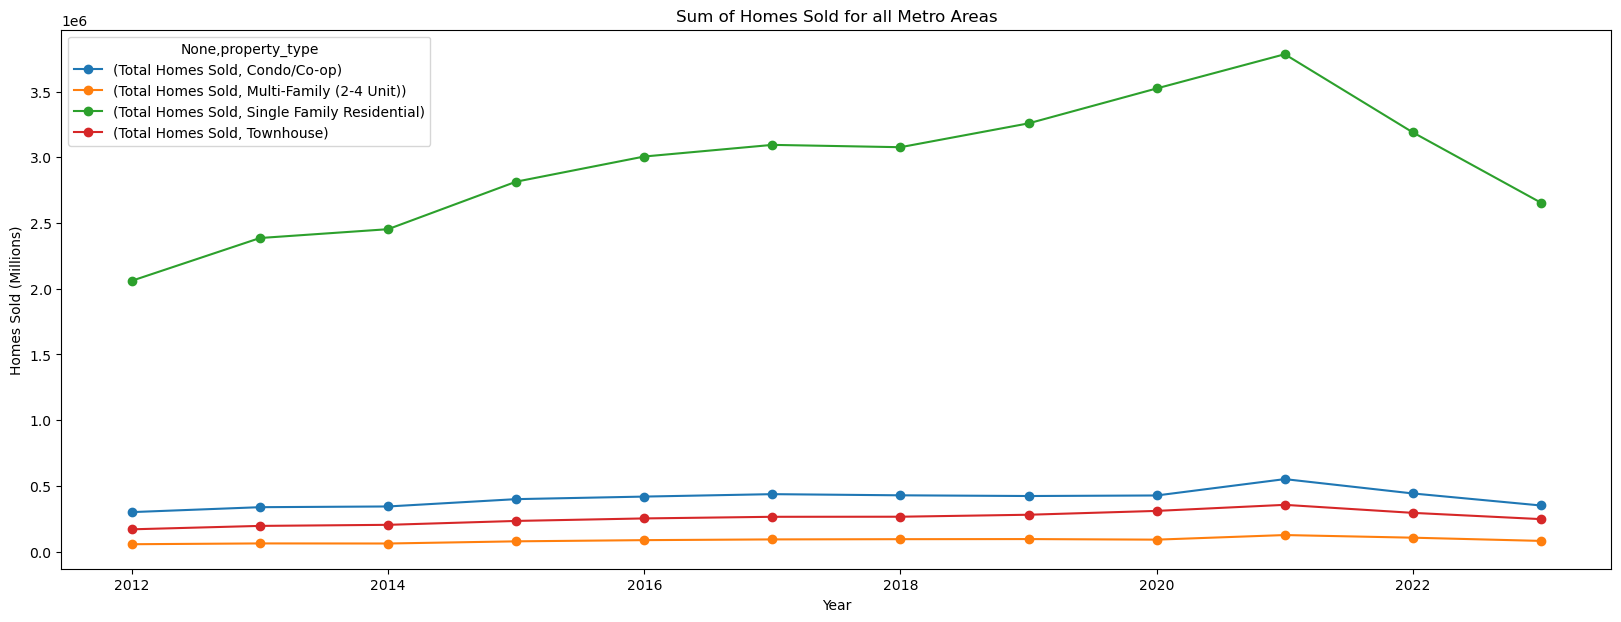

In [15]:
fig, ax = plt.subplots(figsize=(20,7))
#ax.set_ylim(0, max(df_homes2["Total_Homes_Sold"]))
# Set y ticks as numbers
#ax.set_ylim(0, 4000000)
# use unstack()
df_homes2.unstack().plot(ax=ax, marker="o")
plt.title("Sum of Homes Sold for all Metro Areas")
plt.xlabel("Year")
plt.ylabel("Homes Sold (Millions)")

#plt.show()

In [16]:
#get home median sales by hometype
df_homes3=df_homes1_hometype.groupby([df_homes1_hometype.index.year, 'property_type'])['median_sale_price'].agg(['mean']).rename(columns={'mean':'Avg Median Sale Price'}).round(2)
df_homes3

Avg Median Sale Price
period_begin property_type                                   
2012         Condo/Co-op                            143849.29
             Multi-Family (2-4 Unit)                137746.79
             Single Family Residential              142972.20
             Townhouse                              168189.80
2013         Condo/Co-op                            154458.32
             Multi-Family (2-4 Unit)                151610.94
             Single Family Residential              152088.97
             Townhouse                              177955.69
2014         Condo/Co-op                            158868.18
             Multi-Family (2-4 Unit)                168580.56
             Single Family Residential              160450.82
             Townhouse                              185705.31
2015         Condo/Co-op                            164401.69
             Multi-Family (2-4 Unit)                173122.47
             Single Family Residential              168781.76
             Townhouse                              193167.88
2016         Condo/Co-op                            171789.77
             Multi-Family (2-4 Unit)                187511.56
             Single Family Residential              177763.41
             Townhouse                              202487.08
2017         Condo/Co-op                            182256.05
             Multi-Family (2-4 Unit)                202200.38
             Single Family Residential              188554.57
             Townhouse                              215677.84
2018         Condo/Co-op                            192529.01
             Multi-Family (2-4 Unit)                217075.52
             Single Family Residential              200041.74
             Townhouse                              228285.18
2019         Condo/Co-op                            197682.42
             Multi-Family (2-4 Unit)                225336.48
             Single Family Residential              207379.78
             Townhouse                              232996.65
2020         Condo/Co-op                            210396.87
             Multi-Family (2-4 Unit)                240164.84
             Single Family Residential              229056.49
             Townhouse                              251588.24
2021         Condo/Co-op                            239550.84
             Multi-Family (2-4 Unit)                279811.35
             Single Family Residential              266103.35
             Townhouse                              290549.29
2022         Condo/Co-op                            273535.11
             Multi-Family (2-4 Unit)                312434.53
             Single Family Residential              293896.70
             Townhouse                              333625.10
2023         Condo/Co-op                            288709.61
             Multi-Family (2-4 Unit)                323499.15
             Single Family Residential              303224.64
             Townhouse                              352494.25

Text(0, 0.5, 'Homes Sold')

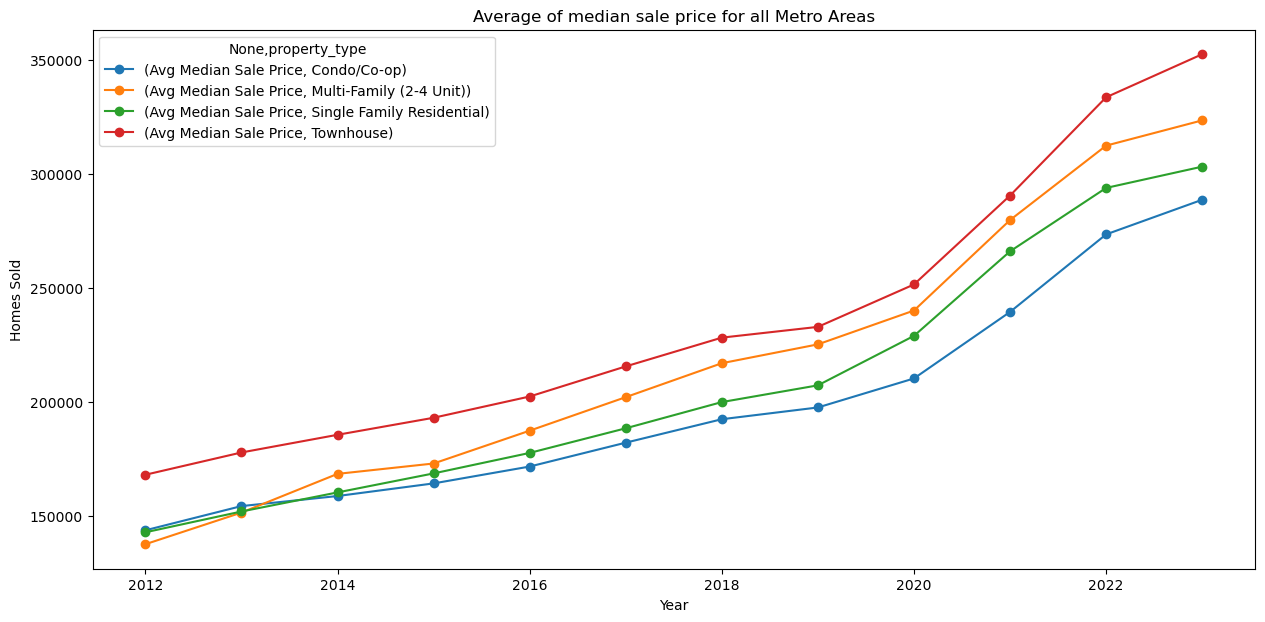

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_homes3.unstack().plot(ax=ax, marker="o")
plt.title("Average of median sale price for all Metro Areas")
plt.xlabel("Year")
plt.ylabel("Homes Sold")

In [18]:
df_homes1_hometype5 = df_homes1_hometype[df_homes1_hometype.parent_metro_region.isin(top5_metro)]
df_homes1_hometype5

,period_end,parent_metro_region_metro_code,parent_metro_region,state_code,property_type_id,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,price_drops
period_begin,,,,,,,,,,,,,,,,,
2015-06-01,2015-06-30,38060,"Phoenix, AZ",AZ,13,Townhouse,156450.0,159900.0,117.292514,116.885056,618.0,499.0,588.0,1413.0,2.3,46.0,0.208776
2018-03-01,2018-03-31,26420,"Houston, TX",TX,6,Single Family Residential,238000.0,265000.0,107.324148,112.943674,6548.0,6038.0,10092.0,21053.0,3.2,45.0,0.251936
2018-06-01,2018-06-30,38060,"Phoenix, AZ",AZ,13,Townhouse,203000.0,195000.0,152.609600,155.895692,737.0,595.0,709.0,1366.0,1.9,38.0,0.208638
2016-03-01,2016-03-31,38060,"Phoenix, AZ",AZ,4,Multi-Family (2-4 Unit),230000.0,227000.0,42.630938,125.519381,48.0,29.0,60.0,225.0,4.7,73.0,0.168889
2012-08-01,2012-08-31,16984,"Chicago, IL",IL,4,Multi-Family (2-4 Unit),120000.0,129500.0,49.839679,52.101946,405.0,326.0,628.0,2570.0,6.3,66.0,0.266148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01,2017-01-31,16984,"Chicago, IL",IL,4,Multi-Family (2-4 Unit),195000.0,199000.0,80.907326,81.179138,319.0,291.0,507.0,1550.0,4.9,58.0,0.203871
2019-09-01,2019-09-30,12060,"Atlanta, GA",GA,3,Condo/Co-op,219500.0,230000.0,190.261747,203.064552,545.0,563.0,946.0,2588.0,4.7,26.0,0.263910
2014-11-01,2014-11-30,19124,"Dallas, TX",TX,13,Townhouse,193757.5,239500.0,114.559995,123.108831,132.0,139.0,112.0,287.0,2.2,33.0,0.181185


Text(0, 0.5, 'Homes Sold')

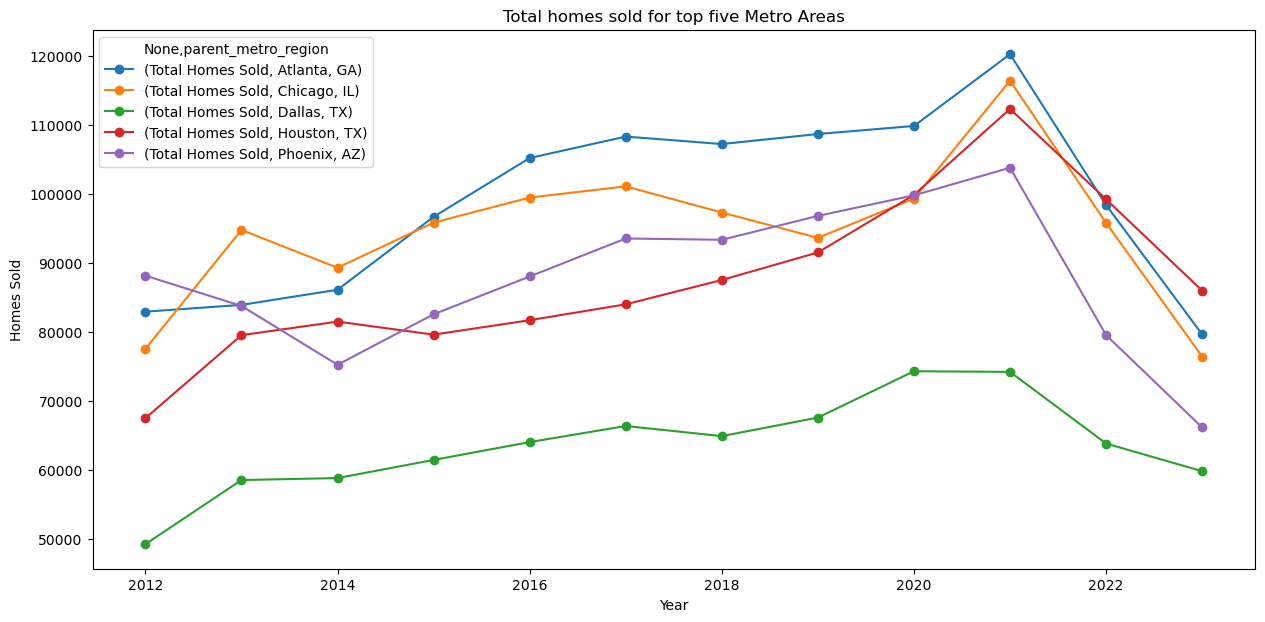

In [19]:
df_homes_metro_sold=df_homes1_hometype5.groupby([df_homes1_hometype5.index.year, 'parent_metro_region'])['homes_sold'].agg(['sum']).rename(columns={'sum':'Total Homes Sold'})
fig, ax = plt.subplots(figsize=(15,7))
df_homes_metro_sold.unstack().plot(ax=ax, marker="o")
plt.title("Total homes sold for top five Metro Areas")
plt.xlabel("Year")
plt.ylabel("Homes Sold")

Text(0, 0.5, 'Homes Sold')

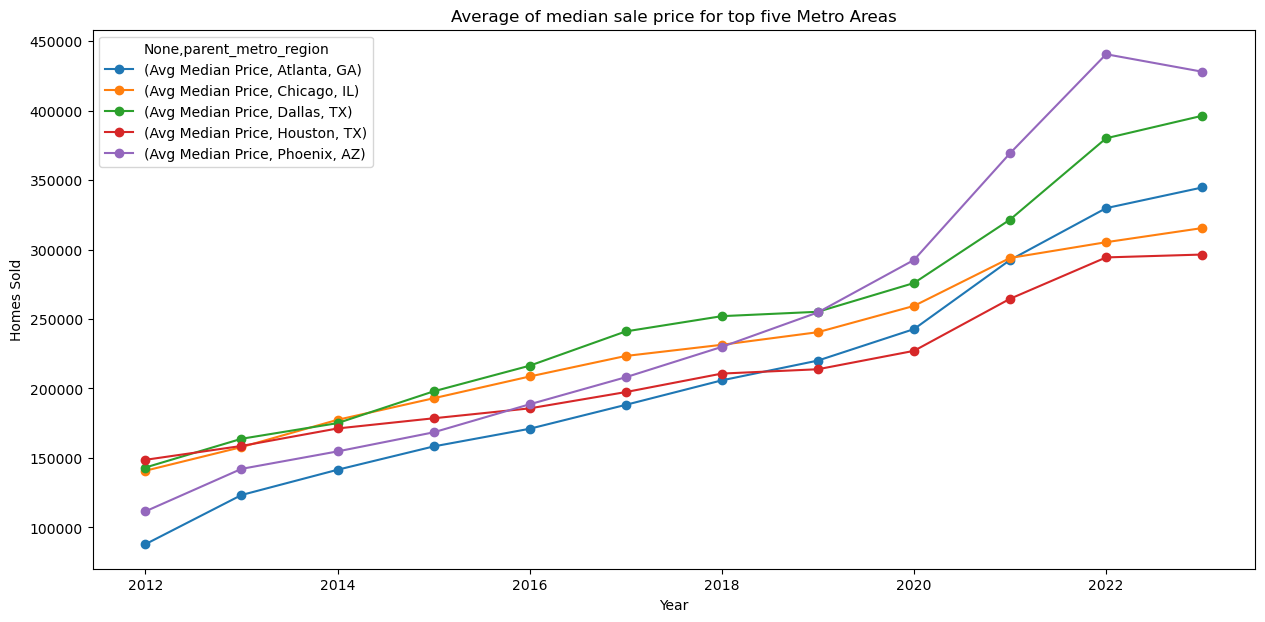

In [20]:
#get home median sales by hometype
df_homes_metro_price=df_homes1_hometype5.groupby([df_homes1_hometype5.index.year, 'parent_metro_region'])['median_sale_price'].agg(['mean']).rename(columns={'mean':'Avg Median Price'}).round(2)
fig, ax = plt.subplots(figsize=(15,7))
df_homes_metro_price.unstack().plot(ax=ax, marker="o")
plt.title("Average of median sale price for top five Metro Areas")
plt.xlabel("Year")
plt.ylabel("Homes Sold")

Text(0, 0.5, 'Homes Sold')

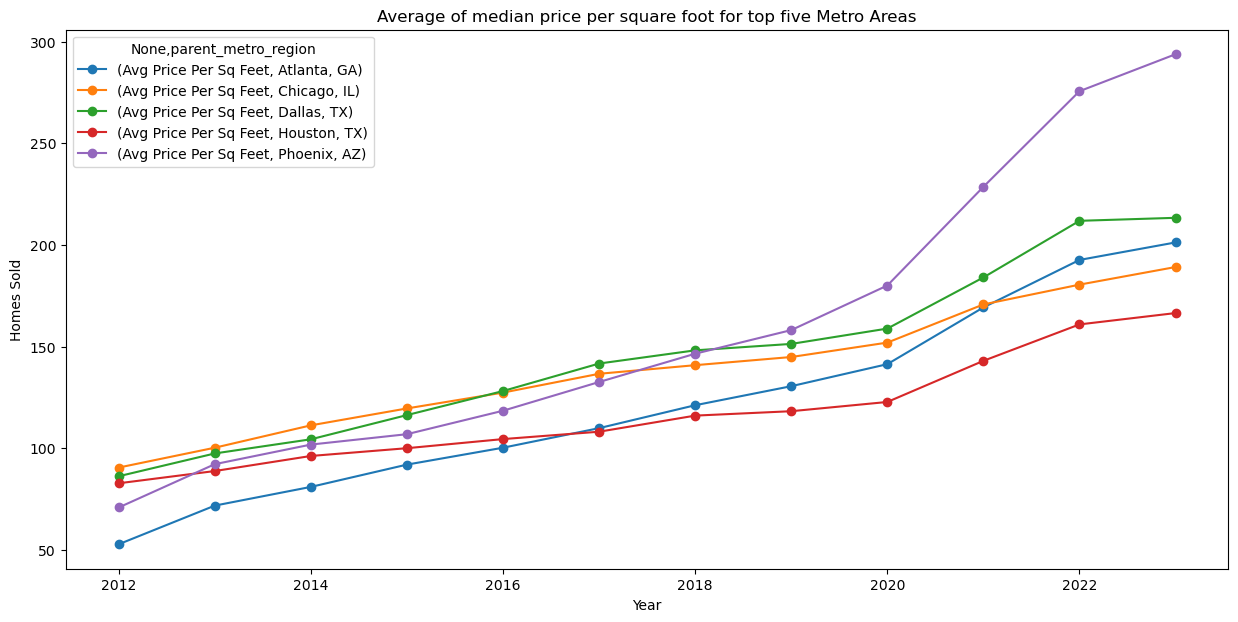

In [21]:
# LIsting Price per Sq Foot (# of bedrooms)
df_homes_metro_ppsf=df_homes1_hometype5.groupby([df_homes1_hometype5.index.year, 'parent_metro_region'])['median_ppsf'].agg(['mean']).rename(columns={'mean':'Avg Price Per Sq Feet'}).round(2)
fig, ax = plt.subplots(figsize=(15,7))
df_homes_metro_ppsf.unstack().plot(ax=ax, marker="o")
plt.title("Average of median price per square foot for top five Metro Areas")
plt.xlabel("Year")
plt.ylabel("Homes Sold")

Text(0, 0.5, 'Homes Sold')

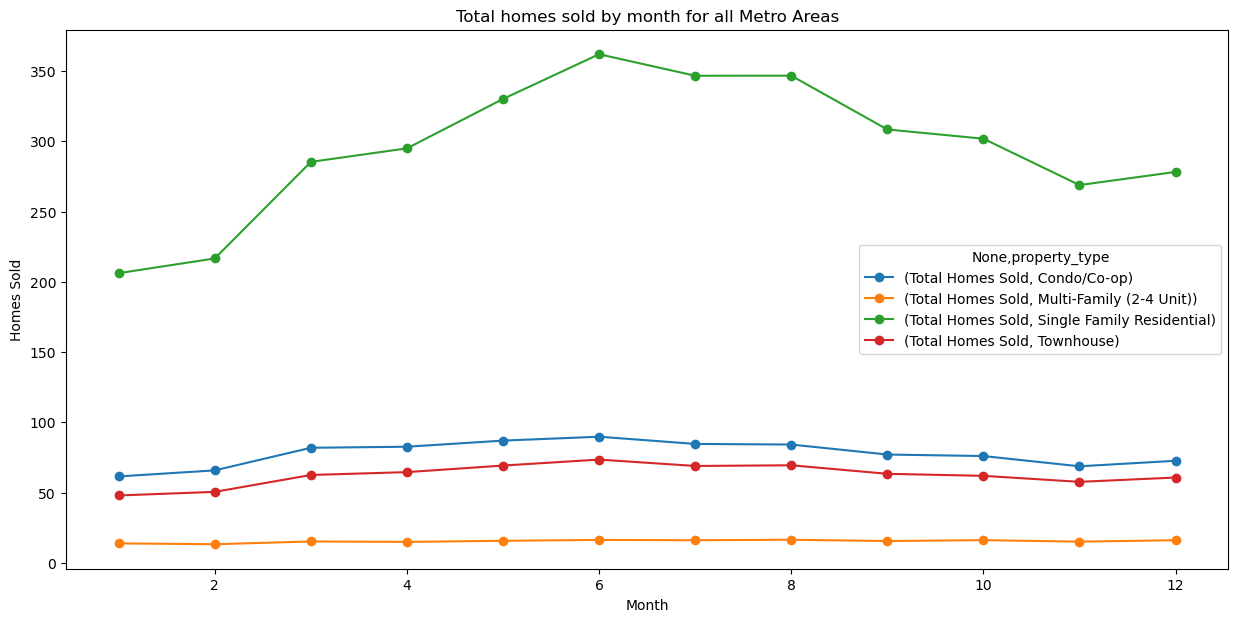

In [22]:
# seasonality/monthly of sales - tbd
df_homes_month=df_homes1_hometype.groupby([df_homes1_hometype.index.month, 'property_type'])['homes_sold'].agg(['mean']).rename(columns={'mean':'Total Homes Sold'})
fig, ax = plt.subplots(figsize=(15,7))
df_homes_month.unstack().plot(ax=ax, marker="o")
plt.title("Total homes sold by month for all Metro Areas")
plt.xlabel("Month")
plt.ylabel("Homes Sold")

In [23]:
df_homes2_hometype = df_homes1_hometype.copy()
df_homes2_hometype["month"]=df_homes2_hometype.index.month
df_homes2_hometype

,period_end,parent_metro_region_metro_code,parent_metro_region,state_code,property_type_id,property_type,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,price_drops,month
period_begin,,,,,,,,,,,,,,,,,,
2016-07-01,2016-07-31,15660,"Calhoun, GA",GA,13,Townhouse,166900.0,122900.0,95.535203,79.339451,2.0,NaN,2.0,6.0,3.0,133.0,0.166667,7
2022-08-01,2022-08-31,33740,"Monroe, LA",LA,6,Single Family Residential,210000.0,215000.0,117.937595,113.065034,156.0,125.0,148.0,312.0,2.0,20.0,0.362179,8
2020-02-01,2020-02-29,39740,"Reading, PA",PA,4,Multi-Family (2-4 Unit),103250.0,129900.0,49.502539,56.662269,10.0,12.0,27.0,69.0,6.9,63.0,0.115942,2
2018-07-01,2018-07-31,37460,"Panama City, FL",FL,13,Townhouse,174700.0,196500.0,124.080882,137.240526,25.0,20.0,53.0,156.0,6.2,94.0,NaN,7
2020-09-01,2020-09-30,15420,"Burley, ID",ID,6,Single Family Residential,207250.0,207500.0,122.710623,129.365592,40.0,23.0,32.0,103.0,2.6,84.0,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,2021-08-31,43740,"Somerset, PA",PA,3,Condo/Co-op,276000.0,327000.0,215.527025,231.182796,6.0,4.0,2.0,9.0,1.5,75.0,0.222222,8
2018-10-01,2018-10-31,28140,"Kansas City, MO",MO,4,Multi-Family (2-4 Unit),170000.0,160000.0,52.623458,68.717277,51.0,NaN,72.0,NaN,2.4,34.0,0.130081,10
2018-05-01,2018-05-31,20100,"Dover, DE",DE,13,Townhouse,177750.0,180000.0,103.021978,97.267980,24.0,19.0,42.0,89.0,3.7,39.0,0.269663,5


In [ ]:
df_homes1

In [27]:
df_homes_12_19 = df_homes1.loc["2012":"2019", :]
df_homes_20_23 = df_homes1.loc["2020":"2023", :]

In [29]:
# create dataframe for 2012-19 with All Residental Median Sale Price
df_homes_12_19_AR = df_homes_12_19[df_homes_12_19['property_type'] == 'All Residential']
df_homes_12_19_AR_sales=df_homes_12_19_AR.groupby([df_homes_12_19_AR.index.year])['median_sale_price'].agg(['mean']).rename(columns={'mean':'Avg Median Sale Price'}).round(2)
df_homes_12_19_AR_sales = df_homes_12_19_AR_sales.reset_index()
df_homes_12_19_AR_sales = df_homes_12_19_AR_sales.rename(columns={'period_begin':'year'})
df_homes_12_19_AR_sales

,year,Avg Median Sale Price
0,2012,137795.88
1,2013,146837.47
2,2014,154448.04
3,2015,162548.62
4,2016,171211.41
5,2017,181764.81
6,2018,193147.15
7,2019,199835.91


In [30]:
# create dataframe for 2020-23 with All Residental Median Sale Price
df_homes_20_23_AR = df_homes_20_23[df_homes_20_23['property_type'] == 'All Residential']
df_homes_20_23_AR_sales=df_homes_20_23_AR.groupby([df_homes_20_23_AR.index.year])['median_sale_price'].agg(['mean']).rename(columns={'mean':'Avg Median Sale Price'}).round(2)
df_homes_20_23_AR_sales = df_homes_20_23_AR_sales.reset_index()
df_homes_20_23_AR_sales = df_homes_20_23_AR_sales.rename(columns={'period_begin':'year'})
df_homes_20_23_AR_sales

,year,Avg Median Sale Price
0,2020,220306.86
1,2021,253871.56
2,2022,280917.58
3,2023,290558.16


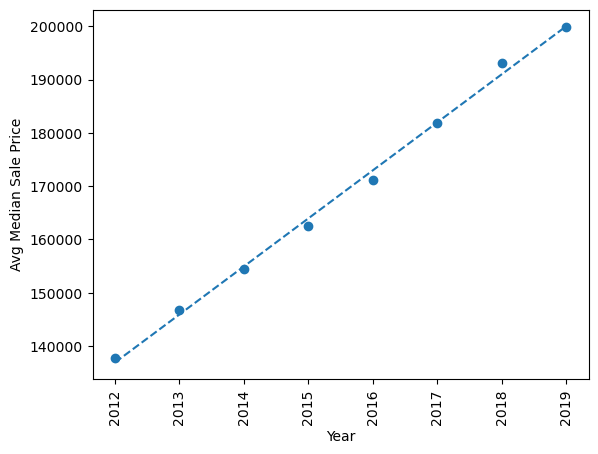

In [31]:
# scatter plot with regression line for 2012 - 2019 data
year = df_homes_12_19_AR_sales['year']
average_median_sales_price_AR_12_19 = df_homes_12_19_AR_sales['Avg Median Sale Price']
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(year,average_median_sales_price_AR_12_19)
p_fit = p_slope * year + p_int
plt.scatter(year,average_median_sales_price_AR_12_19)
plt.plot(year,p_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Avg Median Sale Price')
plt.show()

In [32]:
p_slope.round(2)

9005.26

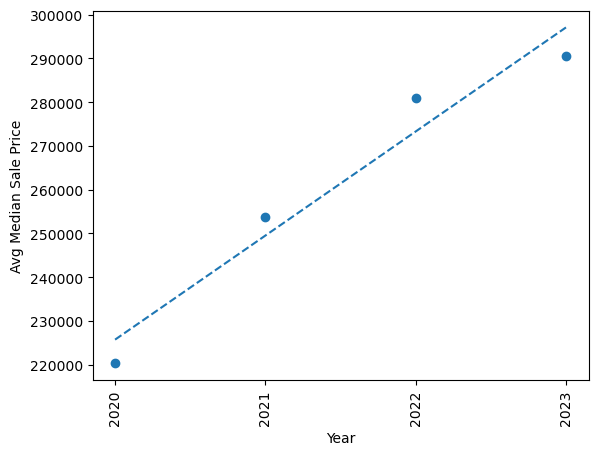

In [33]:
# scatter plot with regression line for 2020 - 2023 data
year = df_homes_20_23_AR_sales['year']
average_median_sales_price_AR_20_23 = df_homes_20_23_AR_sales['Avg Median Sale Price']
q_slope, q_int, q_r, q_p, q_std_err = stats.linregress(year,average_median_sales_price_AR_20_23)
q_fit = q_slope * year + q_int
plt.scatter(year,average_median_sales_price_AR_20_23)
plt.plot(year,q_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Avg Median Sale Price')
plt.show()

In [34]:
q_slope.round(2)

23779.99